4. Условная оптимизация барьерных или штрафных функций

Метод штрафных функций является итерационным алгоритмом для решения задач оптимизации с ограничениями. Вот общий алгоритм метода штрафных функций:

1. Определить функцию цели (функцию, которую требуется минимизировать) и ограничения (равенства и/или неравенства).

2. Ввод начального значения параметра штрафа `r` и коэффициента штрафа `C`.

3. Инициализировать переменные (например, вектор переменных `x`) и установить начальные значения.

4. Определить функцию штрафа `P(x, r)` на основе ограничений. Функция штрафа должна принимать значение 0, когда все ограничения выполняются, и увеличиваться с увеличением нарушений ограничений.

5. Определить функцию, объединяющую функцию цели и функцию штрафа: `F(x) = f(x) + r * P(x, r)`, где `f(x)` - функция цели.

6. Применить метод оптимизации к функции `F(x)` для получения нового значения `x`. Например, можно использовать градиентные методы или методы без градиента, такие как метод Нелдера-Мида или метод Флетчера-Ривза.

7. Проверить выполнение ограничений. Если все ограничения удовлетворены, перейти к шагу 9. В противном случае перейти к шагу 8.

8. Увеличить параметр штрафа `r` путем умножения на коэффициент `C`.

9. Проверить условие сходимости. Если выполнено, завершить алгоритм и вернуть полученное оптимальное значение `x`. В противном случае, вернуться к шагу 6 и продолжить итерации.

Алгоритм штрафных функций повторяет шаги 6-9 до тех пор, пока не будет достигнуто условие сходимости или будет достигнуто требуемое количество итераций. Параметр штрафа `r` увеличивается на каждой итерации, чтобы усилить влияние штрафов на нарушения ограничений и приблизить решение к допустимой области.

Важным аспектом метода штрафных функций является выбор функции штрафа `P(x, r)`. Различные функции штрафа могут быть применены в зависимости от харак

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Метод Флетчера-Ривса (вспомогательный метод)

In [ ]:
def sven_method(x0, h, f):
    left_f_x0, f_x0, rigth_f_x0 = f(x0 - h), f(x0), f(x0 + h)
    if left_f_x0 >= f_x0 <= rigth_f_x0:
        return (x0 - h, x0 + h)
    if left_f_x0 <= f_x0 >= rigth_f_x0:
        return None 
    if left_f_x0 >= f_x0 >= rigth_f_x0:
        x1 = x0 + h 
    if left_f_x0 <= f_x0 <= rigth_f_x0:
        x1 = x0 - h
        h = -h
    h *= 2
    while f(x1) < f(x0):
        tmp = x0 
        x0 = x1
        x1 = x0 + h
        h *= 2

    if h > 0:
        return(tmp, x1)
    return (x1, tmp)

def steepest_gradient_descent_method(x, e1, e2, M, f, plot=False,):
    dx = 0.0000001
    df = lambda x : grad_f(dx, x, f)
    array_dots = []
    k = 0
    g_f = df(x)
    while np.linalg.norm(g_f, ord=2)  >= e1 and k < M:
        t = f_t(x, g_f, f)
        tmp = x
        x = x - t * g_f
        if plot:
            array_dots.append(x.copy())
        if np.linalg.norm(x - tmp, ord=2) < e2  and abs( f(x) - f(tmp)) < e2:
            break
        k +=1
        g_f = df(x)
    return x
    
def dichotomy_method(E, l, f, a, b):

    while abs(a - b) > l:
        y = (a + b - E) / 2
        z = (a + b + E) / 2
        if f(y) > f(z):
            a = y
        else:
            b = z

    return (a + b) / 2

def grad_f(dx, x, f):
    array_x = []
    for i in range(len(x)):
        tmp  = x.copy()
        tmp[i] = tmp[i] - dx
        tmp2 = x.copy()
        tmp2[i] = tmp2[i] + dx
        array_x.append([tmp2, tmp])
    array_x = np.array(array_x)
    tmp = [(f(cloum[0]) - f(cloum[1])) / (2 * dx) for cloum in array_x]
    return np.array(tmp)

def f_t(x, g_f, f,):
    t = lambda t: f(x - g_f * t)
    E = 0.000000001
    l = 0.00001
    random.seed( version=2)
    h = random.uniform(0.1, 1000)
    x0 = random.uniform(-1000, 1000)
    segment = sven_method(x0, h, t)
    if segment:
        a, b = segment 
    ans = dichotomy_method(E, l, t, a, b)
    return ans

def Fletcher_Reeves_method(x0, e1, e2, M, f, plot=False):
    n = x0.size
    dx = 0.0000001
    df = lambda x : grad_f(dx, x, f)
    array_dots = []
    k = 1
    if plot:
        array_dots.append(x0.copy())
    x = steepest_gradient_descent_method(x0, e1, e2, 1, f)
    g_f = df(x)
    prev_x = x0
    d = -df(x0)
    prev_g_f = -d
    if plot:
        array_dots.append(x.copy())
    if np.linalg.norm(x - x0, ord=2) < e2  and abs( f(x) - f(x0)) < e2:
        return x
    while np.linalg.norm(g_f, ord=2)  >= e1 and k < M:
        if  k % n:
            b = 0
        else:
            b = (np.linalg.norm(g_f, ord=2) / np.linalg.norm(prev_g_f, ord=2)) ** 2
        d = -g_f + b * d
        t = f_t(x, -d, f)
        prev_x = x
        prev_g_f = g_f
        x = x - t * g_f
        if plot:
            array_dots.append(x.copy())
        if np.linalg.norm(x - prev_x, ord=2) < e2  and abs(f(x) - f(prev_x)) < e2:
            break
        k +=1
        g_f = df(x)
      
    if plot:
        return x, array_dots
    return x

Функция P вычисляет пенальти-функцию для заданных ограничений. Сначала вычисляется сумма квадратов значений уравнений equations для заданного значения x. Затем с помощью np.vectorize вычисляется массив значений неравенств inequalities для заданного значения x. Если значение неравенства отрицательное, оно заменяется нулем. Затем вычисляется сумма квадратов значений неравенств. Наконец, пенальти-функция вычисляется как половина параметра r, умноженного на сумму уравнений и неравенств.

In [ ]:
def P(x, r, equations, inequalities):
    sum_equations = np.sum([g(x) for g in equations]) ** 2
    array_g_x_inequalities = np.vectorize(lambda g, x: g(x), signature='(),(n)->()',)(inequalities, x)
    array_g_x_inequalities[array_g_x_inequalities < 0] = 0
    sum_inequalities = (array_g_x_inequalities ** 2).sum()
    ans = r / 2 * (sum_equations + sum_inequalities)
    return ans 

Функция step2 выполняет второй шаг метода, в котором оптимизируется целевая функция с добавленной пенальти. В этой части кода определены значения переменных e1, e2 и M, которые используются в методе оптимизации. Затем определяется функция F_Rm, которая принимает аргументы x и f и вызывает метод оптимизации Fletcher_Reeves_method с использованием этих аргументов и предварительно определенных переменных. Функция F определяется как сумма функции f и пенальти bind_P с параметром r. Наконец, функция F_Rm вызывается с аргументами x и F, и результат возвращается.

In [ ]:
def step2(x, r, bind_P, f):
    e1 = 0.01
    e2 = 0.015
    M = 100
    F_Rm = lambda x, f : Fletcher_Reeves_method(x, e1, e2, M, f)
    F = lambda x: f(x) + bind_P(x, r)
    x = F_Rm(x, F)
    return x

Функция penalty_method реализует метод штрафных функций для решения задачи оптимизации с ограничениями. Вначале определяется функция bind_P, которая принимает аргументы x и r и вызывает функцию P для вычисления пенальти. Затем инициализируются переменные x, x1_path и x2_path. Первоначальное значение x устанавливается в [-100, 200], а первые координаты x добавляются в соответствующие пути x1_path и x2_path. Затем происходит выполнение цикла, в котором происходит оптимизация методом step2. Значения координат x добавляются в пути x1_path и x2_path, а затем параметр r умножается на C. Цикл продолжается до тех пор, пока значение пенальти bind_P для текущего x и r не станет меньше e. После завершения цикла функция возвращает x и пути x1_path и x2_path.

In [ ]:

def penalty_method(r, C, f, e, equations, inequalities):
    bind_P = lambda x, r: P(x, r, equations, inequalities)
    x = [-100, 200]
    x = np.array(x, dtype=float)
    x1_path = [x[0]]
    x2_path = [x[1]]
    x = step2(x, r, bind_P, f)
    x1_path.append(x[0])
    x2_path.append(x[1])
    r = r * C
    while abs(bind_P(x, r)) > e :
        x = step2(x, r, bind_P, f)
        x1_path.append(x[0])
        x2_path.append(x[1])
        r = r * C
    return x, x1_path, x2_path

В этой части кода создаются сетки значений x1 и x2 с использованием функции np.linspace, основываясь на значениях пути x1_path и x2_path. Затем с помощью сеток создаются матрицы X1 и X2 с помощью функции np.meshgrid. Функция f вычисляется на сетке [X1, X2], и контурный график этой функции добавляется на вторую подграфике ax2 с помощью функции ax2.contour.

После этого графики отображаются с помощью plt.show().

Затем выводится таблица с значениями функции f, x1_path и x2_path для каждой итерации в цикле. Значения из пути x1_path и x2_path передаются в функцию f, округляются до трех знаков после запятой и выводятся в таблице.

Таким образом, данный код выполняет оптимизацию методом штрафных функций с заданными ограничениями и визуализирует процесс оптимизации.

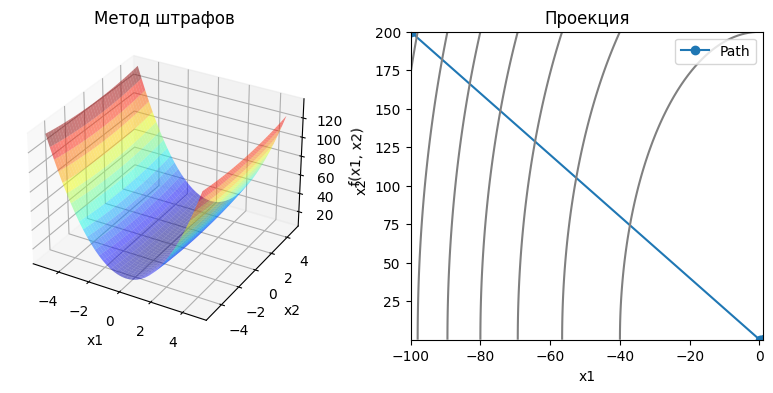

|f 		| x1_path  		| x2_path |
|58007.000 		|-100.000 		|200.000
|7.041 		|0.091 		|0.001


In [23]:
if __name__ == "__main__":
    f = lambda x : 5 * x[0] ** 2 + x[1] ** 2/5 + 7
    equations = []
    inequalities = [ lambda x: x[0] + x[1] - 2, lambda x: -x[0] + 1]
    r = 1
    C = 10
    e = 0.000000000001
    ans, x1_path, x2_path = penalty_method(r, C, f , e, equations, inequalities)

    fig = plt.figure(figsize=(10,4))

    ax1 = fig.add_subplot(121, projection='3d')
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = f([X,Y])
    ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('f(x1, x2)')
    ax1.set_title('Метод штрафов')

    ax2 = fig.add_subplot(122)
    ax2.plot(x1_path, x2_path, '-o', label='Path')
    ax2.legend()
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Проекция')
    x1 = np.linspace(min(x1_path), max(x1_path), 100)
    x2 = np.linspace(min(x2_path), max(x2_path), 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f([X1,X2])
    ax2.contour(X1, X2, Z, colors='grey')


    plt.show()

    print("|f \t\t| x1_path  \t\t| x2_path |")
    for i in range(len(ans)):
        print(f"|{f([x1_path[i], x2_path[i]]):.3f} \t\t|{x1_path[i]:.3f} \t\t|{x2_path[i]:.3f}")
